# Нелинейное одномерное уравнение переноса
Рассмотрим задачу Коши для нелинейного одномерного уравнения переноса
$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x} = 0$$
с начальным условием
$u(0,x)=$\begin{cases} 
1, x>0 \\
0, x<0
\end{cases}
Точным решением данной задачи является функция
$u(t,x)=$\begin{cases} 
0, &x<0 \\
x/t, &0<x<t\\
1, &x>t
\end{cases}
Будем рассматривать решение задачи Коши на отрезке $[a,b]$. С целью минимизации влияния границ  будем задавать на границах интервала постоянные значения функции, определяемой начальными условиями. 

#Схема Лакса
Запишем уравнение переноса в дивергентной форме:
$$\frac{\partial u}{\partial t}+\frac{\partial F}{\partial x} = 0,$$
где $F=u^2/2 - $  поток величины $u$. Запишем разностную схему Лакса:
$$\hat{u_j}-\frac{1}{2}(u_{j+1}+u_{j-1})+\frac{r}{2}(F_{j+1}-F_{j-1})=0,$$
где крышкой обозначен верхний временной слой, а $r=\tau/h - $ отношение шага по времени к шагу по пространству. 
Схема Лакса имеет первый порядок аппроксимации и устойчива при выполнении условия $r \cdot max|u| < 1$.
>Будем решать численную задачу на сетке, имеющую 1000 точек по координате и 1400 отсчетов по времени. Получим графики численного решения (зеленый цвет) и точного решения (красный цвет) при $t=500$ отсчетов.





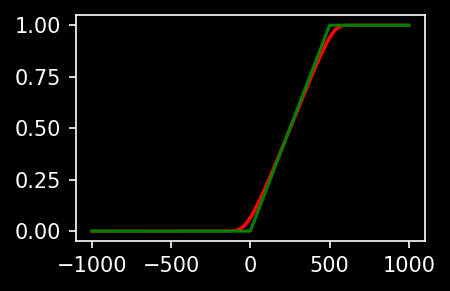

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from IPython.display import HTML


a = -1000
b = 1000
n = 1000 # num of grid points
T0=1400

# x grid of n points
X, dx = np.linspace(a,b,n,retstep=True)
cur=1/dx


# initial conditions
def initial_u(y):
  if y>0:
    return 1.
  else:
    return 0.




def u(x, t):
	uvals = np.zeros(len(x)) # u values for this time step
	
	if t == 0: 
		return np.array([initial_u(x[i]) for i in range(len(x))])
	else:
		for j in range(len(x)):
			if j == 0: # left boundary condition
				uvals[j] = 0.
			if (j>0) and (j<len(x)-1):
				uvals[j] = (U[t-1][j-1]+U[t-1][j+1])/2 - cur*((U[t-1][j+1])**2 - (U[t-1][j-1])**2)/4 #Laax scheme
			if j == len(x)-1: # right boundary condition
				uvals[j] = 1.
			
			
		return uvals

#numerical solution
U = np.ones((T0,len(X)))
for t in range(T0):
    U[t,:] = u(X,t)
		
#true solution    
U1 = np.zeros((len(X),T0))

for t in range (T0):
	for i in range(len(X)):
		if (X[i]<0):
			U1[i,t] = 0.
		if (X[i]>0) and (X[i]<t):	
			U1[i,t] = X[i]/t
	
		if (X[i]>t): 
			U1[i,t] = 1.
			
		   

# plot solution
T=500
plt.figure(figsize=(3, 2))
plt.plot(X, U[:][T],color='red')
plt.plot(X, U1[:,T],color='green')


plt.show()



# Схема Мак-Кормака
Данная схема включает в себя два уравнения - предиктор и корректор:
$$\bar{u}_j-u_j+r(F_{j+1}-F_j)=0$$
$$\hat{u}_j-\frac{1}{2}(u_{j}+\bar{u}_j)+\frac{r}{2}(\bar{F}_j - \bar{F}_{j-1})=0$$
Здесь $\bar{u}_j$ - промежуточные значения, которые вычисляются в предикторе. Окончательные значения на новом временном слое находятся из корректора. Схема Мак-Кормака имеет второй порядок аппроксимации и устойчива при условии $r \cdot max|u| < 1$. 
> Получим численное решение нашей задачи с помощью данной схемы при $t=500$ отсчетов. Видим, что при численном решении с помощью схемы Мак-Кормака наблюдается разрыв и теряется монотонность функции, однако в остальном численное решение в точности повторяет точное решение задачи Коши.







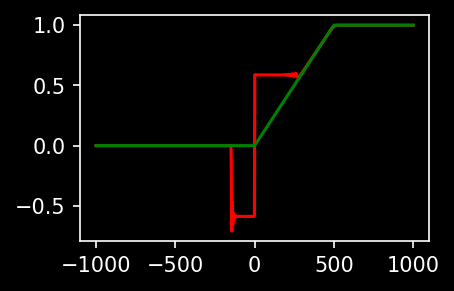

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math



a = -1000
b = 1000
n = 1000 # num of grid points
T0=1400
# x grid of n points
X, dx = np.linspace(a,b,n,retstep=True)
r=1/dx #tau = 1

# initial conditions
def initial_u(y):
  if y>0:
    return 1.
  else:
    return 0.

def u(x, t):#numerical solution
	uvals = np.zeros(len(x)) 
	uvals_p = np.zeros(len(x))
	if t == 0: 
		return np.array([initial_u(x[i]) for i in range(len(x))])
	else:
		for j in range(len(x)):
			
			if (j!=0) and (j!=len(x)-1):
				uvals_p[j] = U[t-1][j]- r*((U[t-1][j+1])**2 - (U[t-1][j])**2)/2 #predictor
				uvals[j] = (uvals_p[j] + U[t-1][j])/2- r*((uvals_p[j])**2 - (uvals_p[j-1])**2)/4 #corrector
			
			if j == len(x)-1: 
				uvals[j] = 1.
				uvals_p[j] = 1.
			if j == 0: 
				uvals[j] = 0.
		return uvals

U = np.ones((T0,len(X)))
for t in range(T0):
    U[t,:] = u(X,t)
  
#true solution   
U1 = np.zeros((len(X),T0))

for t in range (T0):
	for i in range(len(X)):
		if (X[i]<0):
			U1[i,t] = 0.
		if (X[i]>0) and (X[i]<t):	
			U1[i,t] = X[i]/t
	
		if (X[i]>t): 
			U1[i,t] = 1.
			
		   

# plot solution
T=500
plt.figure(figsize=(3, 2))
plt.plot(X, U[:][T], color='red')
plt.plot(X, U1[:,T],color='green')


plt.show()




Зададим другое начальное условие задачи Коши в виде одиночного импульса:
$$u(x,0)=exp(-\frac{(x-x_0)^2}{d^2})$$
Схема Лакса дает следующий результат при $t=500$ отсчетов.

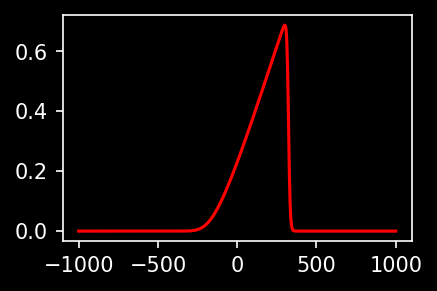

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from IPython.display import HTML


a = -1000
b = 1000
n = 1000 # num of grid points
T0=1400

# x grid of n points
X, dx = np.linspace(a,b,n,retstep=True)
cur=1/dx


# initial conditions
def initial_u(y):
	return math.exp(-((y-10)/100)**2)

def u(x, t):
	uvals = np.zeros(len(x)) # u values for this time step
	
	if t == 0: 
		return np.array([initial_u(x[i]) for i in range(len(x))])
	else:
		for j in range(len(x)):
			if j == 0: # left boundary condition
				uvals[j] = 0.
			if (j>0) and (j<len(x)-1):
				uvals[j] = (U[t-1][j-1]+U[t-1][j+1])/2 - cur*((U[t-1][j+1])**2 - (U[t-1][j-1])**2)/4 #Laax scheme
			if j == len(x)-1: # right boundary condition
				uvals[j] = 0.
			
			
		return uvals

#numerical solution
U = np.ones((T0,len(X)))
for t in range(T0):
    U[t,:] = u(X,t)
	   

# plot solution
T=500
plt.figure(figsize=(3, 2))
plt.plot(X, U[:][T],color='red')



plt.show()

Результат вычисления с помощью схемы Мак-Кормака:

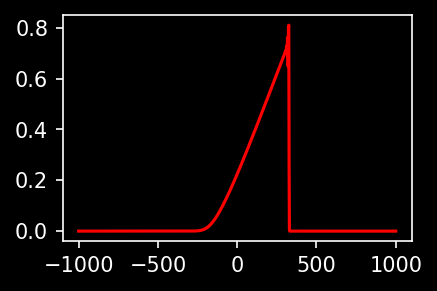

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


a = -1000
b = 1000
n = 1000 # num of grid points
T0=1400
# x grid of n points
X, dx = np.linspace(a,b,n,retstep=True)
r=1/dx #tau = 1

# initial conditions
def initial_u(y):
	return math.exp(-((y-10)/100)**2)

def u(x, t):#numerical solution
	uvals = np.zeros(len(x)) 
	uvals_p = np.zeros(len(x))
	if t == 0: 
		return np.array([initial_u(x[i]) for i in range(len(x))])
	else:
		for j in range(len(x)):
			
			if (j!=0) and (j!=len(x)-1):
				uvals_p[j] = U[t-1][j]- r*((U[t-1][j+1])**2 - (U[t-1][j])**2)/2 #predictor
				uvals[j] = (uvals_p[j] + U[t-1][j])/2- r*((uvals_p[j])**2 - (uvals_p[j-1])**2)/4 #corrector
			
			if j == len(x)-1: 
				uvals[j] = 0.
				uvals_p[j] = 0.
			if j == 0: 
				uvals[j] = 0.
		return uvals

U = np.ones((T0,len(X)))
for t in range(T0):
    U[t,:] = u(X,t)


# plot solution
T=500
plt.figure(figsize=(3, 2))
plt.plot(X, U[:][T], color='red')



plt.show()
